In [8]:
# Import needed functionalities
import numpy as np
import pandas as pd
import scipy.spatial.distance as ssd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from tqdm import tqdm

In [9]:
# Import datasets
data3Dfull = pd.read_csv('data/data3.csv')
data6Dfull = pd.read_csv('data/data6.csv')

In [10]:
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(prop, dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  prop
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    # perform scaling on the dataset
    dataset = preprocessing.scale(dataset)
    # Turn into a pandas array again
    d = {'V'+str(i+1) : dataset[:,i] for i in range(len(dataset[0]))}
    dataset = pd.DataFrame(d)
    
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run the sampling
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

In [11]:
# Make train and test sets
data3D = get_sample_from_dataset(0.05, data3Dfull)
data6D = get_sample_from_dataset(0.05, data6Dfull)

# trainidx = int(.8 * len(data3D))
# train = data3D[:trainidx]
# test = data3D[trainidx:]

The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 6)


In [12]:
def dist(a,b, metric='euclidean'):
    dist = ssd.euclidean(a, b) if metric=='euclidean' else ssd.cityblock(a, b)
    return dist

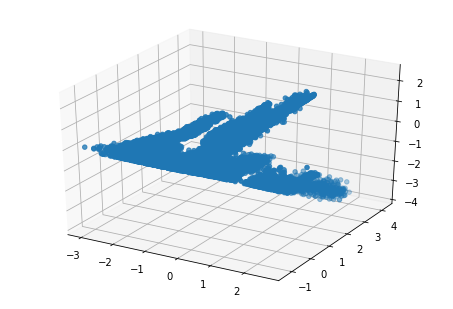

In [13]:
# Plot 3D figure
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data3D['V1'], data3D['V2'], data3D['V3'])

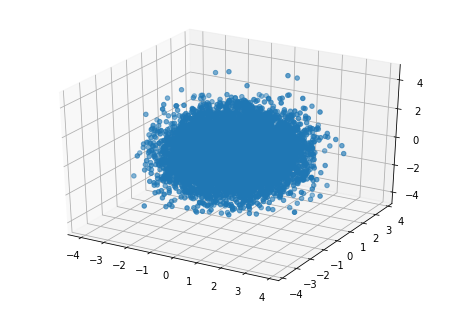

In [14]:
# Plot 6D figure
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data6D['V4'], data6D['V5'], data6D['V6'])

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


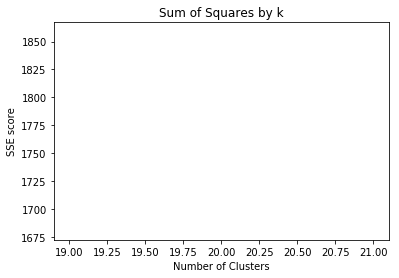

In [15]:
# Number of clusters
cluster_range = range(20,21)

# clustering and SSE score based elbow
kmeans = [KMeans(n_clusters=k,random_state=42) for k in cluster_range]
score_inertia = [kmeans[i].fit(data3D).inertia_ for i in tqdm(range(len(kmeans)))]

# ploting metric vs kmeans
fig = plt.figure()
plt.plot(cluster_range,score_inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE score')
plt.title('Sum of Squares by k')
plt.show()

# Predicting the clusters
# labels = kmeans.predict(data3D)
# Getting the cluster centers
# C = kmeans.cluster_centers_

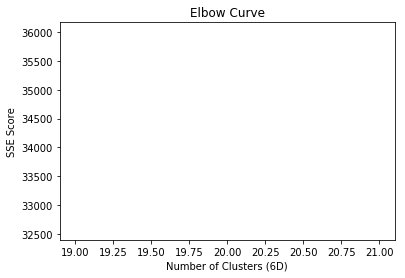

In [17]:
# Number of clusters in 6D Dataset
cluster_range = range(20,21)

# clustering and SSE score based elbow
score = []
# KMeans for cluster_range number of clusters
kmeans = [KMeans(n_clusters=k,random_state=42) for k in cluster_range]
# score of each KMeans method
score = [kmeans[i].fit(data6D).inertia_ for i in range(len(kmeans))]
# ploting metric vs kmeans
fig = plt.figure()
plt.plot(cluster_range,score)
plt.xlabel('Number of Clusters (6D)')
plt.ylabel('SSE Score')
plt.title('Elbow Curve')
plt.show()

# Predicting the clusters
# labels = kmeans.predict(data3D)
# Getting the cluster centers
# C = kmeans.cluster_centers_

In [18]:
# clustering and silhouette score based elbow    
silhouette_avg = []
# KMeans for cluster_range number of clusters
for k in tqdm(cluster_range):
    kmeans = KMeans(n_clusters=k,random_state=42) 
    # score of each KMeans method
    cluster_labels = kmeans.fit_predict(data3D)
    silhouette_avg.append(silhouette_score(data3D, cluster_labels))

100%|██████████| 1/1 [00:09<00:00,  9.41s/it]


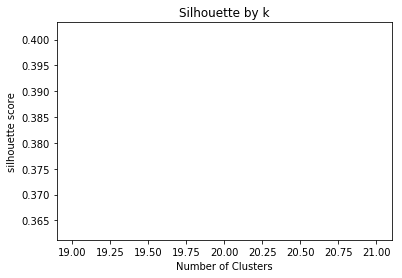

In [19]:
# ploting metric vs kmeans
fig = plt.figure()
plt.plot(cluster_range, silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.title('Silhouette by k')
plt.show()